In [1]:
import json
import seaborn as sns
import pandas as pd

In [2]:
f = open('wav2vec2-large-rbg-tamil/trainer_state.json')
data = json.load(f)

In [3]:
step = list()
wer = list()
eval_loss = list()
for item in data["log_history"]:
    if 'eval_wer' in item:
        step.append(item['step'])
        wer.append(item['eval_wer'])
        eval_loss.append(item["eval_loss"])

In [4]:
f = open('wav2vec2-large-rbg-tamil-native/trainer_state.json')
data = json.load(f)

In [5]:
n_step = list()
n_wer = list()
n_eval_loss = list()
for item in data["log_history"]:
    if 'eval_wer' in item:
        n_step.append(item['step'])
        n_wer.append(item['eval_wer'])
        n_eval_loss.append(item["eval_loss"])

In [6]:
a = pd.DataFrame.from_dict({"Step": n_step, "Transliterated WER": wer[0:25], "Native WER": n_wer,
                       "Transliterated Loss": eval_loss[0:25], "Native Loss": n_eval_loss})

## Plotting evaluation loss

In [7]:
b = a[['Transliterated Loss',
       'Native Loss']]

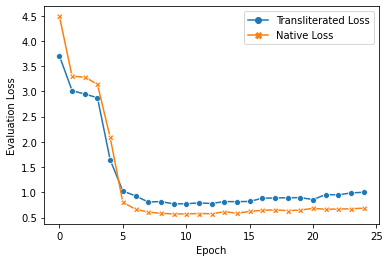

In [8]:
ax = sns.lineplot(data=b, markers=True, dashes=False)
ax.set(xlabel="Epoch", ylabel = "Evaluation Loss")
a2 = ax.get_figure()
a2.savefig("figures/loss.png", dpi=300)

## Plotting word error rate

In [9]:
b1 = a[['Transliterated WER', 'Native WER']]

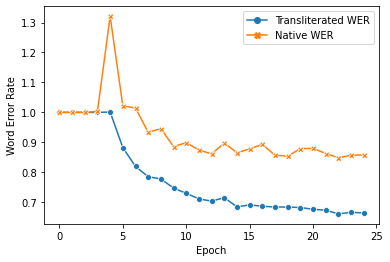

In [10]:
ax = sns.lineplot(data=b1, markers=True, dashes=False)
ax.set(xlabel="Epoch", ylabel = "Word Error Rate")
a1 = ax.get_figure()
a1.savefig("figures/wer.png", dpi=300)